
**Predicting Patient's Treatment**

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv("/content/d3.csv")

# Check the number of rows that contain any null values
null_rows = df.isnull().any(axis=1).sum()

print(f"Number of rows with any null values: {null_rows}")


Number of rows with any null values: 6928


In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv("/content/d3.csv")

# Remove rows with any null values
clean_df = df.dropna()

# Save the cleaned data to a new CSV file
clean_df.to_csv("/content/t2.csv", index=False)

print(f"Original number of rows: {len(df)}")
print(f"Number of rows after removing nulls: {len(clean_df)}")


Original number of rows: 17029
Number of rows after removing nulls: 10101


Start with here


In [ ]:
#Data

df= pd.read_csv("/content/t2.csv")
df.head(3)

,age,sex,physiological_context,visit_motivation,admission_reason,diagnosis_test,diagnosis_result,related_condition,reason_for_treatment,treatment_name
0,4-year-old,Girl,Previously healthy,Routine surveillance chest radiograph,"Painless, right-sided abdominal mass",Pathology,Favorable histology and negative margins,Wilms tumor,Standard treatment for Stage II Wilms tumor,Chemotherapy
1,47,Female,Past medical history includes a right thyroid ...,"Chest pain and dyspnea, weight loss",Suspected lung cancer with distant metastasis ...,Lung biopsy,Primary lung adenocarcinoma with predominantly...,Primary lung adenocarcinoma,Treatment for diagnosed primary lung adenocarc...,Chemotherapy
2,51,male,Muscle-invasive urothelial cell carcinoma diag...,New exertional dyspnea and syncopal episode,Progressive dyspnea with minimal exertion and ...,PET/CT scan,Complete metabolic response in the right ventr...,Right ventricular mass,Mass was not resectable and chemotherapy was n...,Palliative radiotherapy


In [ ]:
#all lower
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df.head(2)

#remove duplicates
print(f"shape of dataframe: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"shape of dataframe after ddup: {df.shape}")

#random set of 10k records
# df = df.sample(n=10000, random_state=45)

shape of dataframe: (10101, 10)
shape of dataframe after ddup: (10066, 10)


In [ ]:
# Printing 2 full records

pd.set_option('display.max_colwidth', None)
df.head(2)

,age,sex,physiological_context,visit_motivation,admission_reason,diagnosis_test,diagnosis_result,related_condition,reason_for_treatment,treatment_name
0,4-year-old,girl,previously healthy,routine surveillance chest radiograph,"painless, right-sided abdominal mass",pathology,favorable histology and negative margins,wilms tumor,standard treatment for stage ii wilms tumor,chemotherapy
1,47,female,past medical history includes a right thyroid lobectomy for a large benign thyroid nodule and cyst about two years ago.,"chest pain and dyspnea, weight loss",suspected lung cancer with distant metastasis (clinical stage iv),lung biopsy,primary lung adenocarcinoma with predominantly micropapillary carcinoma component,primary lung adenocarcinoma,treatment for diagnosed primary lung adenocarcinoma,chemotherapy


In [ ]:
pd.reset_option('display.max_colwidth')

In [ ]:
# About the data

#Shape
print(f"---------shape of the dataframe--------\n {df.shape}")

# null values
print("\n--------null values of dataframe:----------- ")
print(df.isna().sum())

# datatypes of all columns
print("\n--------Datatypes of all columns----------- ")
print(df.dtypes)

# unique values in diagnosis (label colum)
df['treatment_name'] = df['treatment_name'].str.lower()
print(f"\n -----------------Unique treatments:-------------\n {df['treatment_name'].nunique()}")
df["treatment_name"].value_counts()


---------shape of the dataframe--------
 (10066, 10)

--------null values of dataframe:----------- 
age                      0
sex                      0
physiological_context    0
visit_motivation         0
admission_reason         0
diagnosis_test           0
diagnosis_result         0
related_condition        0
reason_for_treatment     0
treatment_name           0
dtype: int64

--------Datatypes of all columns----------- 
age                      object
sex                      object
physiological_context    object
visit_motivation         object
admission_reason         object
diagnosis_test           object
diagnosis_result         object
related_condition        object
reason_for_treatment     object
treatment_name           object
dtype: object

 -----------------Unique treatments:-------------
 100


treatment_name
antibiotics                613
chemotherapy               474
aspirin                    375
blood transfusion          309
conservative management    295
                          ... 
nivolumab                   27
losartan                    26
oral steroids               21
omeprazole                  20
risperidone                 12
Name: count, Length: 100, dtype: int64

In [ ]:
#Label the target variable

from sklearn.preprocessing import LabelEncoder

df_model= df
label_encoder = LabelEncoder()
df_model['label'] = label_encoder.fit_transform(df_model['treatment_name'])
df_model.head(3)

,age,sex,physiological_context,visit_motivation,admission_reason,diagnosis_test,diagnosis_result,related_condition,reason_for_treatment,treatment_name,label
0,4-year-old,girl,previously healthy,routine surveillance chest radiograph,"painless, right-sided abdominal mass",pathology,favorable histology and negative margins,wilms tumor,standard treatment for stage ii wilms tumor,chemotherapy,24
1,47,female,past medical history includes a right thyroid ...,"chest pain and dyspnea, weight loss",suspected lung cancer with distant metastasis ...,lung biopsy,primary lung adenocarcinoma with predominantly...,primary lung adenocarcinoma,treatment for diagnosed primary lung adenocarc...,chemotherapy,24
2,51,male,muscle-invasive urothelial cell carcinoma diag...,new exertional dyspnea and syncopal episode,progressive dyspnea with minimal exertion and ...,pet/ct scan,complete metabolic response in the right ventr...,right ventricular mass,mass was not resectable and chemotherapy was n...,palliative radiotherapy,74


In [ ]:
# X = df_model.drop(['diagnosis','label'], axis=1)  # Features
df_model["X"]= ( df_model["age"] + " " + df_model["sex"] + " " + df_model["visit_motivation"] + " " + df_model["physiological_context"] + " "
     + df_model["admission_reason"] + " " + df_model["diagnosis_test"] + " " + df_model["diagnosis_result"] +
     " " + df_model["related_condition"] + " " + df_model["reason_for_treatment"])

In [ ]:
# data preprocess- remove punct and all.
#1. remove the punctuation and stopwords
#2. lemmatize to the base words

import spacy
nlp= spacy.load("en_core_web_sm")

def preprocess(text):
    doc =nlp(str(text))
    filtered_token = []

    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_token.append(token.lemma_)

    return " ".join(filtered_token)

In [ ]:
df_model['X'].head()

0    4-year-old girl routine surveillance chest rad...
1    47 female chest pain and dyspnea, weight loss ...
2    51 male new exertional dyspnea and syncopal ep...
3    59 male evaluation of bilateral pulmonary nodu...
4    65 male vesicular rash in the thoracic dermato...
Name: X, dtype: object

In [ ]:
df_model["tokens"]= df_model['X'].apply(preprocess)

In [ ]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_model['tokens'])
y = df_model['label']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f'Accuracy: {accuracy:.4f}')

# from sklearn.metrics import classification_report
# # Evaluate the model
# print(classification_report(y_test, y_pred))

Accuracy: 0.7622


In [ ]:
from sklearn.metrics import f1_score

# print(f"F1 Score: {f1_score(y_test, y_pred)}")

# Calculate F1 score with different averaging methods
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"F1 Score (Micro): {f1_micro}")
print(f"F1 Score (Macro): {f1_macro}")
print(f"F1 Score (Weighted): {f1_weighted}")

F1 Score (Micro): 0.7621648460774578
F1 Score (Macro): 0.7718840321284136
F1 Score (Weighted): 0.762880009927427


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Predict probabilities
y_pred_prob = model.predict_proba(X_test)

# Binarize the labels
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

print(f"shape of true labels: {y_test.shape}")
print(f"shape of probabiliities labels: {y_pred_prob.shape}")

shape of true labels: (2014,)
shape of probabiliities labels: (2014, 100)


In [ ]:
# Calculate AUC score
auc = roc_auc_score(y_test_binarized, y_pred_prob, multi_class='ovr')
print(f"AUC Score: {auc}")

AUC Score: 0.9739843851596683


In [ ]:
# # Compute ROC-AUC score for each class
# auc_scores = []
# for i in range(len(lb.classes_)):
#     auc = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])
#     auc_scores.append(auc)

# # Average AUC scores across all classes
# import numpy as np

# avg_auc = np.mean(auc_scores)
# print(f"AUC: {avg_auc}")

SVM

Accuracy: 0.6907
F1 Score (Weighted): 0.6923
Confusion Matrix:
[[ 3  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 29]]


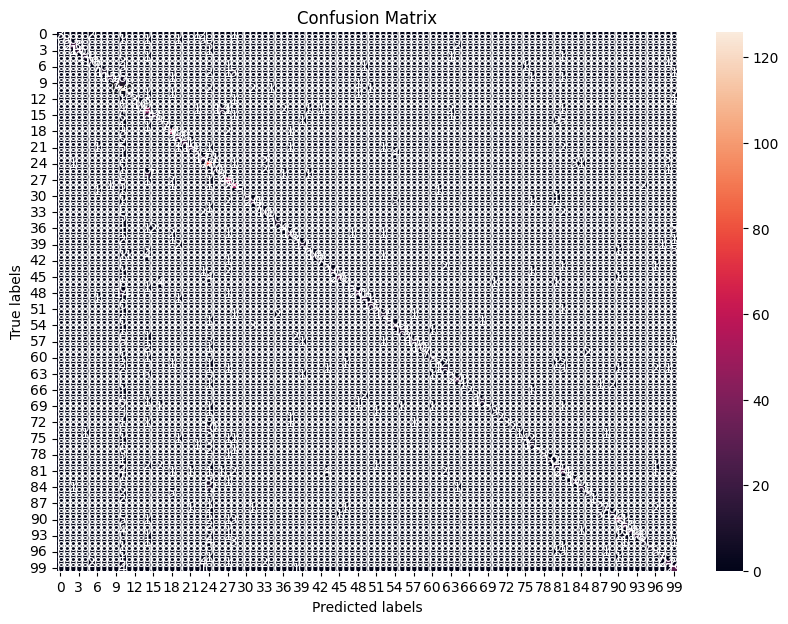

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Use SVC (Support Vector Classification)
model = SVC(random_state=42)
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score (Weighted): {f1:.4f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


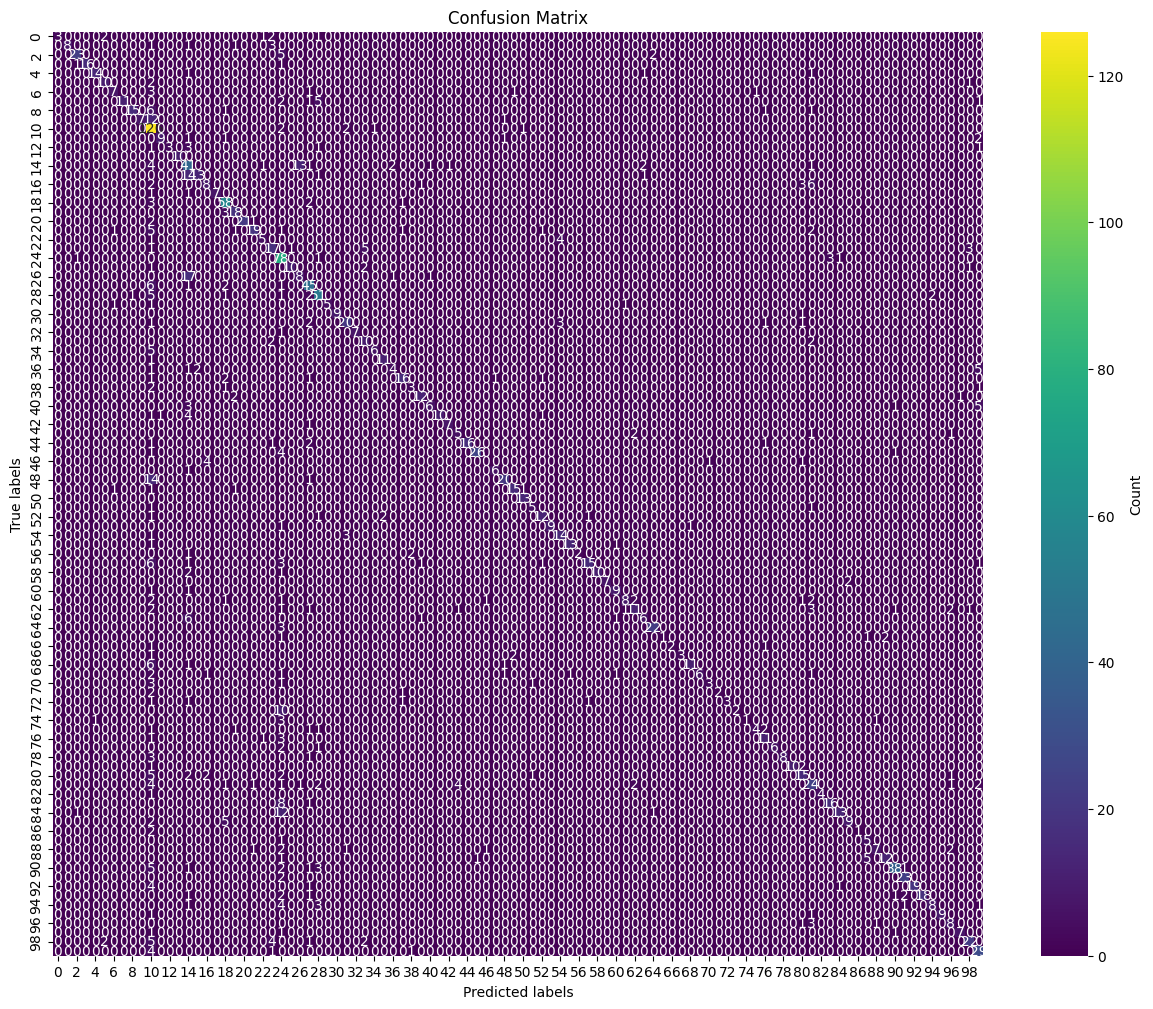

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 12))  # Increase figure size for better visibility
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", cbar_kws={'label': 'Count'})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
!pip install transformers
!pip install torch
!pip install sklearn


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
!pip install transformers torch


In [ ]:
import pandas as pd
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model = AutoModelForSequenceClassification.from_pretrained("emilyalsentzer/Bio_ClinicalBERT", num_labels=2)

# Load your dataset
df = pd.read_csv("/content/t2.csv")  # Update the path to your dataset location

# Assuming your dataset has a 'text' column for the clinical notes and 'label' for diagnosis
texts = df['text'].tolist()
labels = df['label'].tolist()  # Ensure labels are numerical and correspond to the number of classes

# Tokenization
encodings = tokenizer(texts, truncation=True, padding=True, max_length=512, return_tensors="pt")

# Split data into train and test sets
train_texts, val_texts, train_labels, val_labels = train_test_split(encodings['input_ids'], labels, test_size=0.2, random_state=42)

# Convert labels to tensors
train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)

# Training settings
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.train()

# Training loop
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
for epoch in range(3):  # Adjust epoch count as needed
    for idx in range(len(train_texts)):
        inputs = train_texts[idx].unsqueeze(0).to(device)
        label = train_labels[idx].unsqueeze(0).to(device)
        outputs = model(inputs, labels=label)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        print(f"Epoch {epoch+1}, Step {idx+1}, Loss: {loss.item()}")

# Evaluation
model.eval()
with torch.no_grad():
    inputs = val_texts.to(device)
    labels = val_labels.to(device)
    outputs = model(inputs)
    predictions = torch.argmax(outputs.logits, dim=1)
    accuracy = accuracy_score(val_labels.cpu().numpy(), predictions.cpu().numpy())
    f1 = f1_score(val_labels.cpu().numpy(), predictions.cpu().numpy(), average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(classification_report(val_labels.cpu().numpy(), predictions.cpu().numpy()))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


KeyError: 'text'